# Set up

Dataset : https://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/lastfm-360K.html

credits : https://www.last.fm/

**In this project we are groing to try to predict the age of the music listener**

In [0]:
!wget http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz

--2019-05-29 08:44:50--  http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz
Resolving mtg.upf.edu (mtg.upf.edu)... 84.89.139.55
Connecting to mtg.upf.edu (mtg.upf.edu)|84.89.139.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569202935 (543M) [application/x-gzip]
Saving to: ‘lastfm-dataset-360K.tar.gz’

lastfm-dataset-360K 100%[===================>] 542.83M  1.57MB/s    in 6m 1s   

2019-05-29 08:50:51 (1.51 MB/s) - ‘lastfm-dataset-360K.tar.gz’ saved [569202935/569202935]



In [0]:
!mkdir data
!tar -xf lastfm-dataset-360K.tar.gz -C data

# Data process

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
user_plays_path = 'data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
user_profile_path = 'data/lastfm-dataset-360K/usersha1-profile.tsv'

In [0]:
play_df = pd.read_csv(user_plays_path, sep="\t", header=None)
user_df = pd.read_csv(user_profile_path, sep="\t", header=None)

In [0]:
play_df.columns = ['user_id', 'artist_id', 'artist_name', 'played_times']
play_df.head()

,user_id,artist_id,artist_name,played_times
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [0]:
user_df.columns = ['user_id', 'gender', 'age', 'country', 'signup_date']
user_df.head()

,user_id,gender,age,country,signup_date
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [0]:
combined_df = pd.merge(user_df, play_df)
combined_df.head()

,user_id,gender,age,country,signup_date,artist_id,artist_name,played_times
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007",bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [0]:
tmp = combined_df[combined_df.notnull()]
tmp.count()

user_id         17535569
gender          15948106
age             13896298
country         17535569
signup_date     17535569
artist_id       17309433
artist_name     17535365
played_times    17535569
dtype: int64

In [0]:
import seaborn as sns
sns.set(style="darkgrid")

In [0]:
a = tmp.count()
names, counts = list(dict(a).keys()), list(dict(a).values())

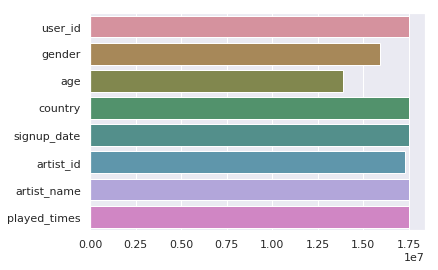

In [0]:
sns.barplot(counts, names, saturation=0.5, palette='husl')

As it is seen from the above bar chart, the age class has less number of observations than the rest of the classes, lets try to model a function that would predict the model based on other parameters like artist_name, played_times, country and gender

In [0]:
data = tmp.drop(['user_id', 'artist_id'], axis=1)

In [0]:
del tmp, names, counts, combined_df, user_df, play_df
import gc
gc.collect()

11

In [0]:
data.columns

Index(['gender', 'age', 'country', 'signup_date', 'artist_name',
       'played_times'],
      dtype='object')

In [0]:
data.head()

,gender,age,country,signup_date,artist_name,played_times
0,f,22.0,Germany,"Feb 1, 2007",betty blowtorch,2137
1,f,22.0,Germany,"Feb 1, 2007",die Ärzte,1099
2,f,22.0,Germany,"Feb 1, 2007",melissa etheridge,897
3,f,22.0,Germany,"Feb 1, 2007",elvenking,717
4,f,22.0,Germany,"Feb 1, 2007",juliette & the licks,706


Now, there is a need to convert the categorical data first

In [0]:
# changing gender column
d1 = pd.get_dummies(data['gender'], prefix='gender_')
data = pd.concat([data, d1], axis=1)
data = data.drop(['gender'], axis=1)
data.head()

,age,country,signup_date,artist_name,played_times,gender__f,gender__m
0,22.0,Germany,"Feb 1, 2007",betty blowtorch,2137,1,0
1,22.0,Germany,"Feb 1, 2007",die Ärzte,1099,1,0
2,22.0,Germany,"Feb 1, 2007",melissa etheridge,897,1,0
3,22.0,Germany,"Feb 1, 2007",elvenking,717,1,0
4,22.0,Germany,"Feb 1, 2007",juliette & the licks,706,1,0


In [0]:
# chaning country column
d1 = pd.get_dummies(data['country'], prefix='country', sparse=True) # if i don't use sparse it leads to memory error
data = pd.concat([data, d1], axis=1)
data = data.drop(['country'], axis=1)
del d1
data.head()

,age,signup_date,artist_name,played_times,gender__f,gender__m,country_Afghanistan,country_Albania,country_Algeria,country_American Samoa,country_Andorra,country_Angola,country_Anguilla,country_Antarctica,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Bouvet Island,country_Brazil,country_British Indian Ocean Territory,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,...,country_Sri Lanka,country_Sudan,country_Suriname,country_Svalbard and Jan Mayen,country_Swaziland,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan,country_Tajikistan,"country_Tanzania, United Republic of",country_Thailand,country_Timor-Leste,country_Togo,country_Tokelau,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Turks and Caicos Islands,country_Tuvalu,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_United States Minor Outlying Islands,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,"country_Virgin Islands, British","country_Virgin Islands, U.s.",country_Wallis and Futuna,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,22.0,"Feb 1, 2007",betty blowtorch,2137,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22.0,"Feb 1, 2007",die Ärzte,1099,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22.0,"Feb 1, 2007",melissa etheridge,897,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22.0,"Feb 1, 2007",elvenking,717,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22.0,"Feb 1, 2007",juliette & the licks,706,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# change the signup date
import datetime
def change_date(x):
  """Function to convert the date into timestamp."""
  t = datetime.datetime.strptime(x, '%b %d, %Y').timestamp()
  return t

data['signup_date'] = data['signup_date'].apply(lambda x : change_date(x))

In [0]:
data.to_csv('data.csv', sep='\t', encoding='utf-8')
data.head()

In [0]:
# changing artist_name column
d1 = pd.get_dummies(data['artist_name'], prefix='artist_', sparse=True)
data = pd.concat([data, d1], axis=1)
data = data.drop(['artist_name'], axis=1)
del d1
data.head()

In [0]:
data.to_csv('data.csv', sep='\t')

In [20]:
len(data.columns)

292607